In [24]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Experiment 1a - Uncoupled 3-box

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [35]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 5

# Initialize forcing vectors and run experiments
experiments = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, exp in enumerate(experiments):
  full_outputs[exp] = BudykoSellers.Run_Budyko_Sellers(exp_flag=i)
  forcings[exp] = np.tile(full_outputs[exp]['forcing_ts'], (n_boxes, 1))
  T_out[exp] = np.squeeze(full_outputs[exp]['T_ts'])[0:n_boxes,:]

100%|██████████| 22827/22827 [00:00<00:00, 35469.11it/s]
/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:308: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  # Set ODE parameters
100%|██████████| 22827/22827 [00:00<00:00, 33891.14it/s]


### Method X: DMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.054332869442648715
	Test: High Emissions - 0.7985972306372324
	Test: Overshoot - 0.49775667591844436
Train: High Emissions - L2 Error
	Test: 2xCO2 - 1.2314026993142293
	Test: High Emissions - 0.0008424351639782824
	Test: Overshoot - 0.7689126804802296
Train: Overshoot - L2 Error
	Test: 2xCO2 - 2.054417415638113
	Test: High Emissions - 0.03155307402036834
	Test: Overshoot - 0.0006242231570004145


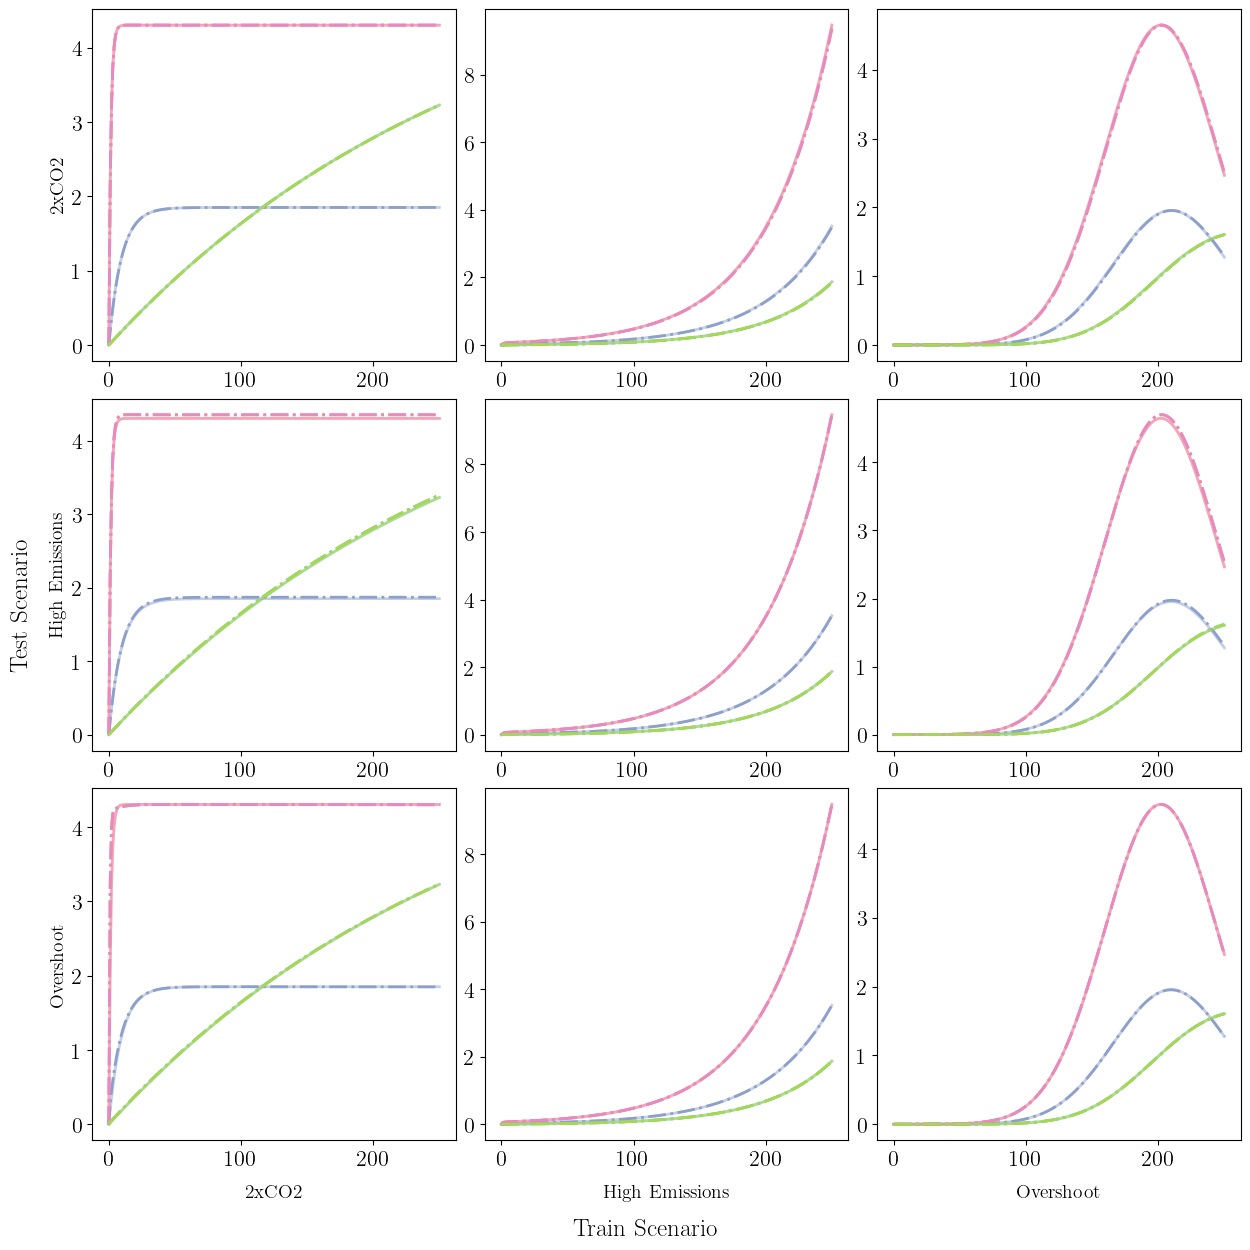

In [36]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD, L2_DMD = emulator_utils.emulate_experiments('DMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt, n_steps=n_steps, n_boxes=n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, experiments)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.05433286944246475
	Test: High Emissions - 1.4987624041664487
	Test: Overshoot - 1.117189631357224
Train: High Emissions - L2 Error
	Test: 2xCO2 - 1.2842714037483653
	Test: High Emissions - 0.000842160115637447
	Test: Overshoot - 0.7793278812959085
Train: Overshoot - L2 Error
	Test: 2xCO2 - 2.045896230377219
	Test: High Emissions - 0.031549016065244115
	Test: Overshoot - 0.0005565906876687175


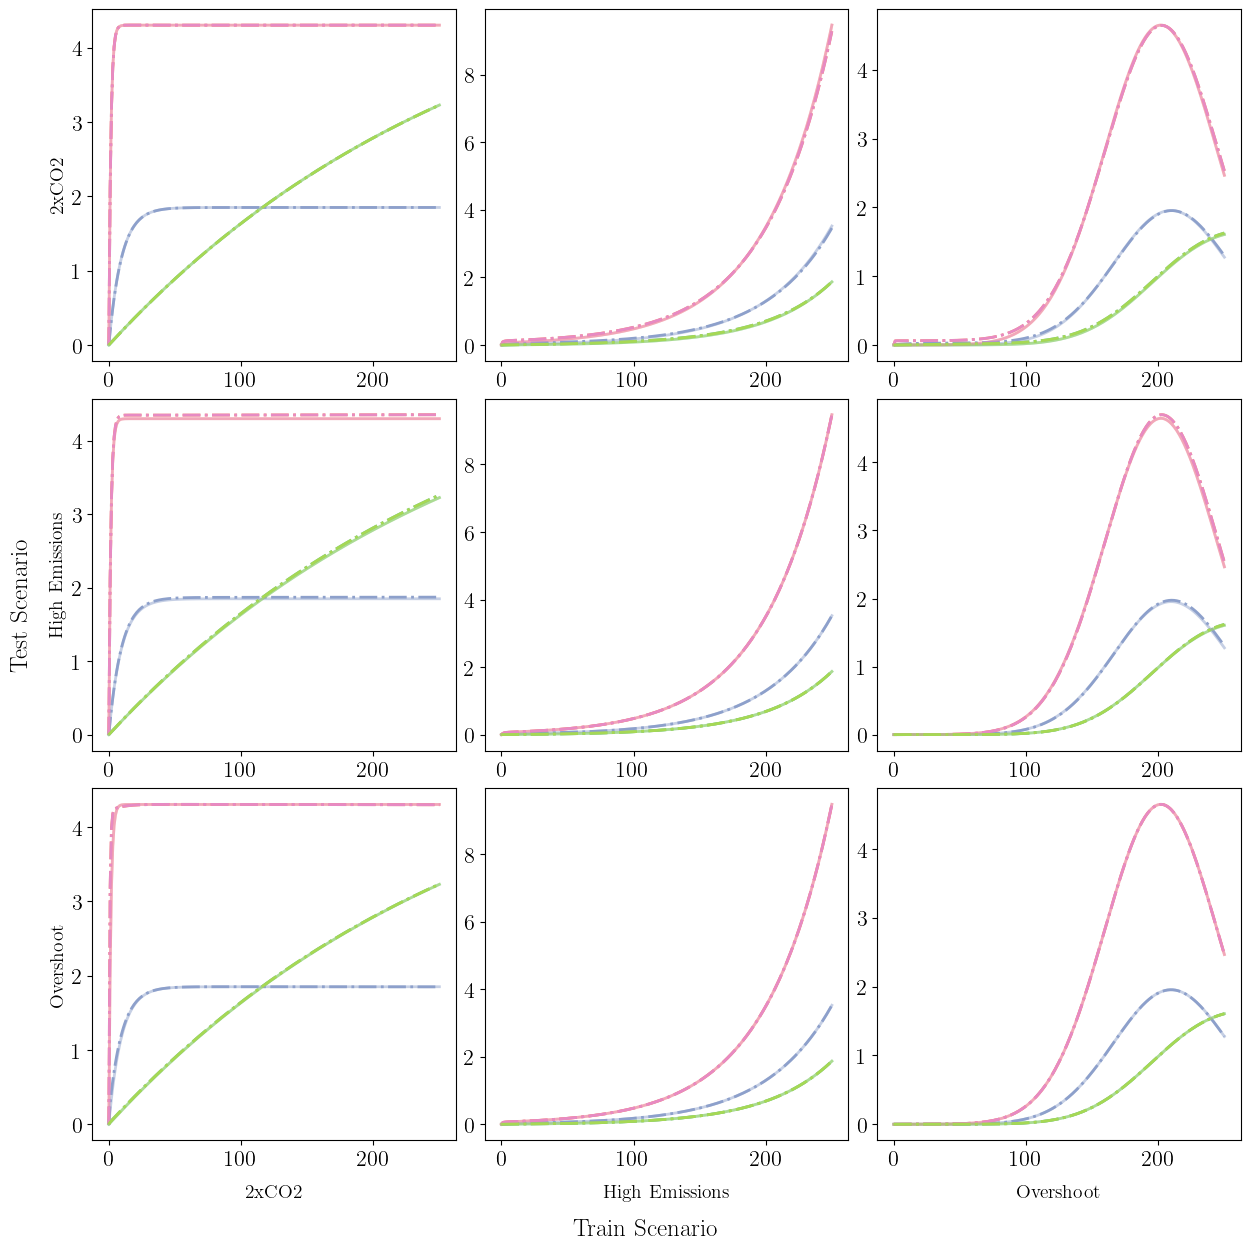

In [37]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='polynomial', degree=1)
F_dict = emulator_utils.Vector_Dict(method='polynomial', degree=1)
operator_EDMD, T_pred_EDMD, L2_EDMD = emulator_utils.emulate_experiments('EDMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt,
                                                                n_steps=n_steps, n_boxes=n_boxes, w_dict=w_dict, F_dict=F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, experiments)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 2.843643763486786e-14
	Test: High Emissions - 0.7785810586866767
	Test: Overshoot - 0.48668944674607506
Train: High Emissions - L2 Error
	Test: 2xCO2 - 1.2027675833327827
	Test: High Emissions - 4.2218392726804337e-14
	Test: Overshoot - 0.7516548455691935
Train: Overshoot - L2 Error
	Test: 2xCO2 - 1359175.4480164354
	Test: High Emissions - 22412.658966528692
	Test: Overshoot - 6.070369566042452e-14


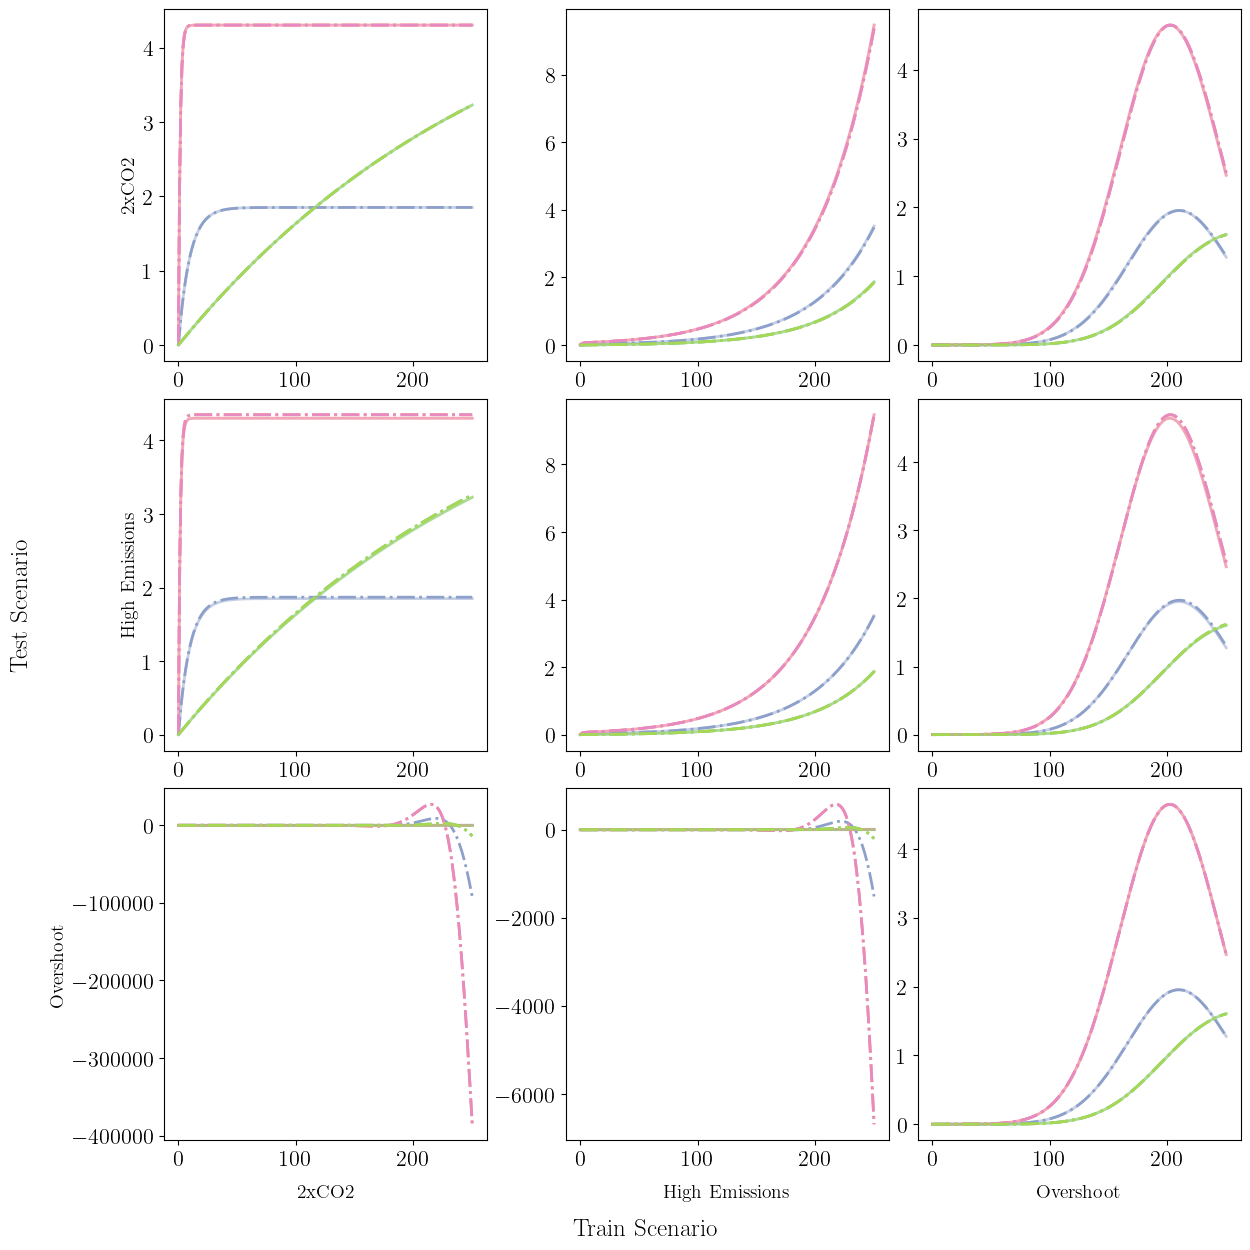

In [38]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve, L2_deconvolve = emulator_utils.emulate_experiments('deconvolve', experiments=experiments, outputs=T_out, forcings=forcings, dt=dt)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, experiments)

### Method X: Direct Diagnosis (FDT)

100%|██████████| 22827/22827 [00:00<00:00, 35167.15it/s]


Train: Impulse Forcing - L2 Error
	Test: 2xCO2 - 1.5730398636794063
	Test: High Emissions - 0.26961399061701136
	Test: Overshoot - 0.9335296520994525


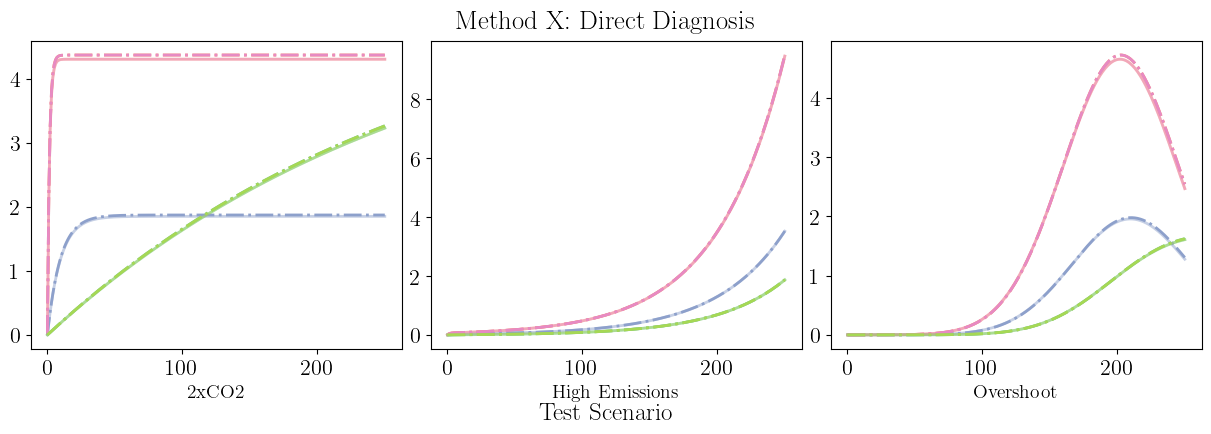

In [42]:
operator_direct, T_pred_direct, L2_direct = emulator_utils.emulate_experiments('direct', experiments=experiments, outputs=T_out, forcings=forcings, n_boxes=n_boxes, dt=dt)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, experiments)

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 0.27822371  0.48773399  0.63824443  0.85676915  0.33759874  0.26533712
  0.63673702  0.85944325  0.30267345  0.43690284 -0.99648563 -0.01702768]
	Test: 2xCO2 - 19.127367133797048
	Test: High Emissions - 17.827643545229012
	Test: Overshoot - 13.442067125443835
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.24647648 -0.14322011  1.14193492  0.2118971   0.29322374  1.1812897
  1.10751663  0.50050263  0.18650187  0.35967846 -0.59940298 -1.82752517]
	Test: 2xCO2 - 30.742318562359927
	Test: High Emissions - 0.1777039883847578
	Test: Overshoot - 7.461012179639379
Train: Overshoot - L2 Error
Exponential Fit Results:
 [ 0.17079021  0.16689255  0.69325031  0.64708134  0.25294239  0.35615876
  0.66740967  0.71163284  0.18273861  0.13819282 -0.23406454 -1.42164905]
	Test: 2xCO2 - 27.083780884942758
	Test: High Emissions - 4.181376555936554
	Test: Overshoot - 6.593228891857796


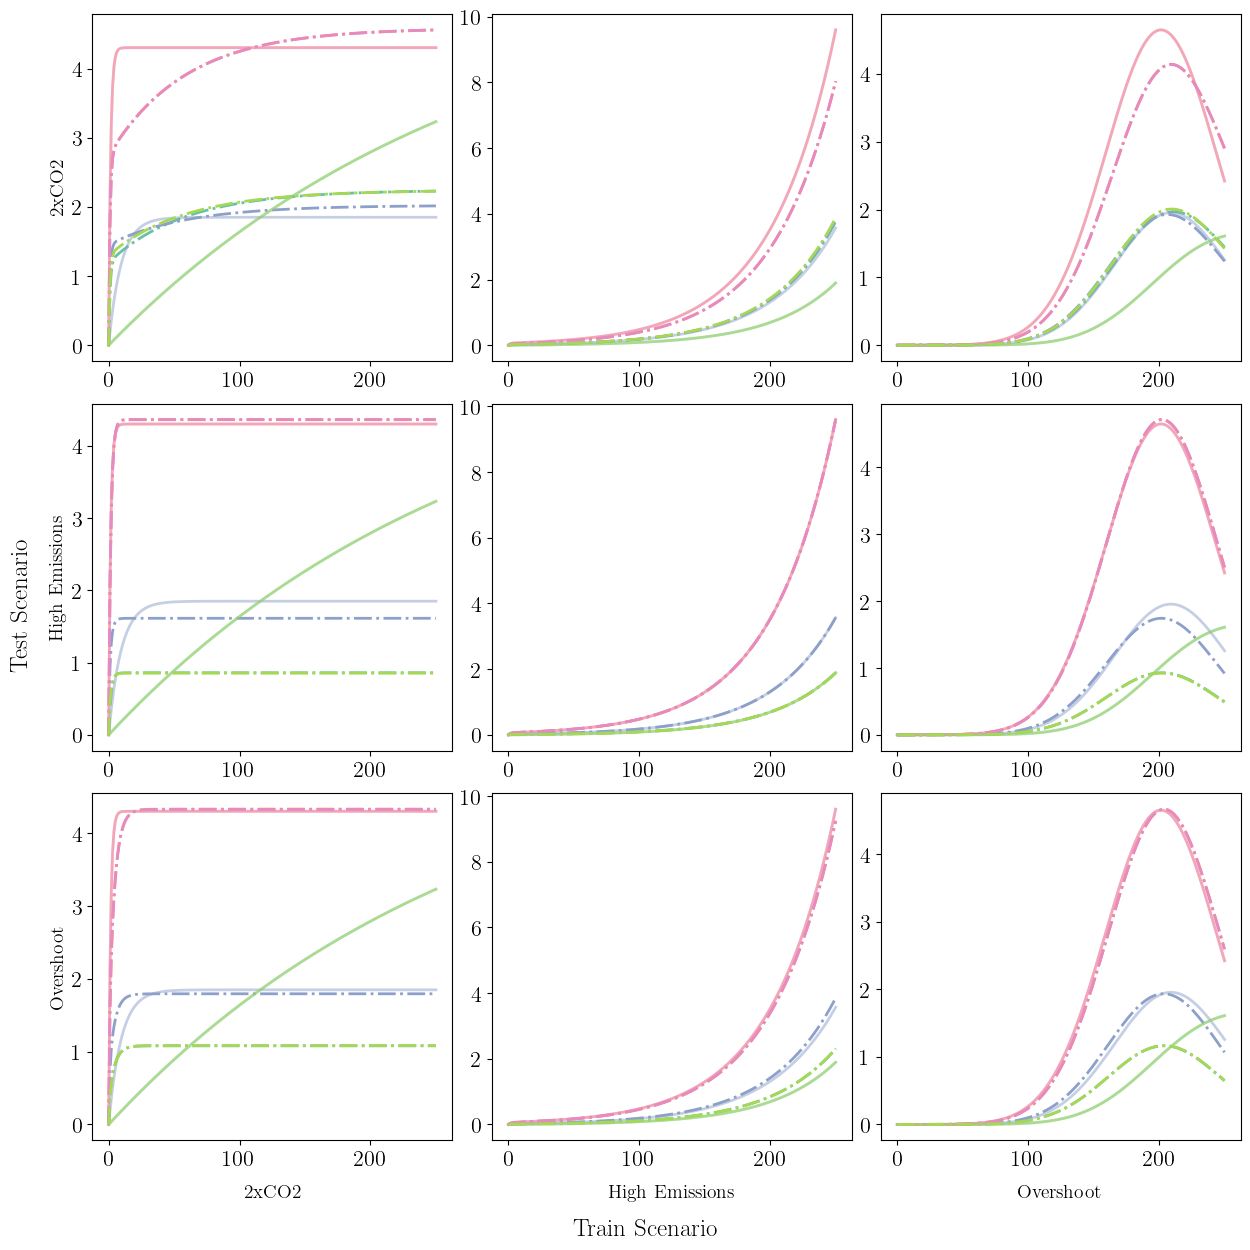

In [34]:
operator_fit, T_pred_fit = emulator_utils.emulate_experiments(experiments, T_out, forcings, 'fit', w0, t, dt, n_steps, n_boxes, n_modes=2, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit, experiments)